# Heat equation

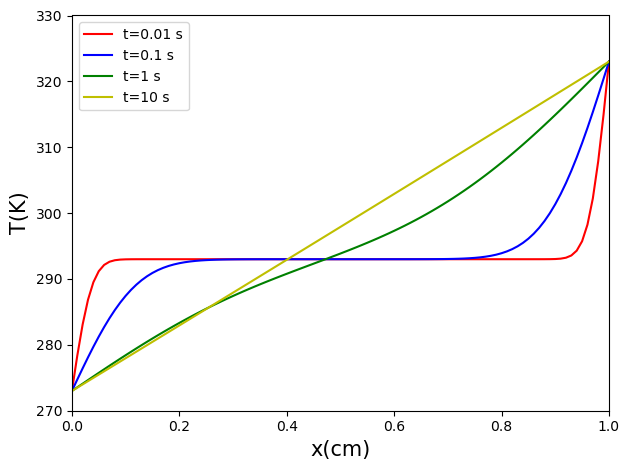

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Jan 22 17:11:58 2020

@author: astro
"""
#EXERCISE 9.2: FTCS method for the heat equation
import numpy as np
import math as mt
import matplotlib.pyplot as plt

L=1 #cm flat base of container 
N=int(100)
a=L/N   #space step
h=1e-4 #time step
T0=293 #K initially at a uniform temperature 
Tc=273 #K, cold water temperature
Th=323 #k, hot water temperature
D=4.25e-2 #cm2/s given value for D 
#below values are the vlue for the given time 
t1=0.01 #s
t2=0.1 
t3=1
t4=10
#create arrays
T=np.zeros(N+1,float)
x=[]
x.append(0.0)
T[0]=Tc  #initial conditions
T[N]=Th
T[1:N]=T0

def diffusion(v,tin,tend):
    vnew=np.zeros(N+1,float)
    vnew[0]=v[0]
    vnew[N]=v[N]
    t=tin
    while(t<tend):
        for i in range(1,N):
            vnew[i]=v[i]+h*D*(v[i+1]+v[i-1]-2*v[i])/(a*a) #v at time t+h
         #above eqn. is for FTCS for initial-value PDEs  
        v,vnew=vnew,v 
        t=t+h
    return v

        
for j in range(N):
    X=x[j]+a #a=length step
    x.append(X)


#plot and temperature profiles
T1=diffusion(T,0,t1)
g1,=plt.plot(x,T1,color='r') #t=0.01 s
T2=diffusion(T,t1,t2)
g2,=plt.plot(x,T2,color='b') #t=0.1 s
T3=diffusion(T,t2,t3)
g3,=plt.plot(x,T3,color='g') #t=1 s
T4=diffusion(T,t3,t4)
g4,=plt.plot(x,T4,color='y') #t=10 s
plt.legend([g1,g2,g3,g4],['t=0.01 s','t=0.1 s', 't=1 s', 't=10 s'], fontsize='10', loc='upper left')
plt.xlabel('x(cm)',fontsize='15')
plt.ylabel('T(K)',fontsize='15')
plt.xlim(0.0,1.0)
plt.ylim(270,330)
plt.tight_layout()
plt.show()
